<a href="https://colab.research.google.com/github/liang-kan/python/blob/main/3_2%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E7%9A%84%E4%BB%8E%E9%9B%B6%E5%BC%80%E5%A7%8B%E5%AE%9E%E7%8E%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install d2l==0.14.
%matplotlib inline
import random
import torch
from d2l import torch as d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.6 MB/s eta 0:00:00


In [4]:
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.9370, -0.4884]) 
label: tensor([1.9989])


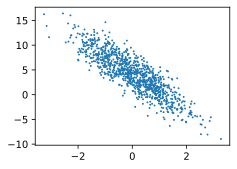

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9122, -0.5909],
        [-1.5971, -1.5740],
        [ 0.4432,  0.3264],
        [ 0.3650, -0.0423],
        [ 0.2759,  0.8502],
        [ 0.1167, -0.4619],
        [ 0.8878, -0.9881],
        [-0.1486,  0.1399],
        [ 0.3017, -0.2850],
        [-2.4354,  1.1537]]) 
 tensor([[ 4.3795],
        [ 6.3404],
        [ 3.9687],
        [ 5.0822],
        [ 1.8640],
        [ 6.0067],
        [ 9.3474],
        [ 3.4148],
        [ 5.7736],
        [-4.6044]])
